In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a=cv2.imread('pic.jpg')
b=plt.imread('pic.jpg')

(<matplotlib.axes._subplots.AxesSubplot at 0x1d9030740b8>,
 <matplotlib.image.AxesImage at 0x1d903173c50>)

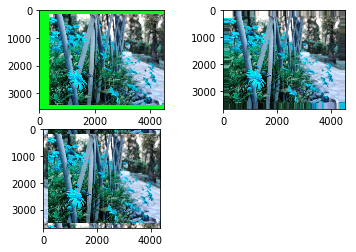

In [22]:
im1=cv2.copyMakeBorder(a,150,150,350,10,cv2.BORDER_CONSTANT,value=[5,255,25])
im2=cv2.copyMakeBorder(a,200,200,200,200,cv2.BORDER_REPLICATE)
im3=cv2.copyMakeBorder(a,200,200,200,10,cv2.BORDER_WRAP) 
plt.subplot(2,2,1),plt.imshow(im1)
plt.subplot(2,2,2),plt.imshow(im2)
plt.subplot(2,2,3),plt.imshow(im3)

4.524093460449141


True

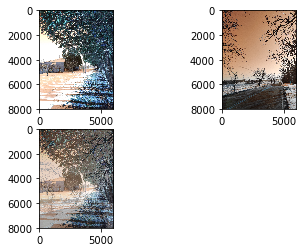

In [55]:
img1=cv2.imread('xj1.jpg')
img2=cv2.imread('xj2.jpg')
e1 = cv2.getTickCount()
st = cv2.addWeighted(img1,0.6,img2,0.4,0)
plt.subplot(2,2,1),plt.imshow(img1)
plt.subplot(2,2,2),plt.imshow(img2)
plt.subplot(2,2,3),plt.imshow(st)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)
cv2.useOptimized()

(<matplotlib.axes._subplots.AxesSubplot at 0x1d905af0dd8>,
 <matplotlib.image.AxesImage at 0x1d905b4bb70>)

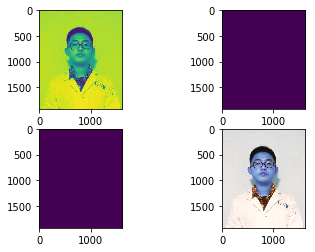

In [53]:
rows,cols,channels = img2.shape 
roi = img2[0:rows, 0:cols ]
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) #convert the color set to gray
ret, mask = cv2.threshold(img2gray, 255,5, cv2.THRESH_BINARY) 
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.subplot(2,2,1),plt.imshow(img2gray)
plt.subplot(2,2,2),plt.imshow(mask)
plt.subplot(2,2,3),plt.imshow(mask_inv)
plt.subplot(2,2,4),plt.imshow(roi)



error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


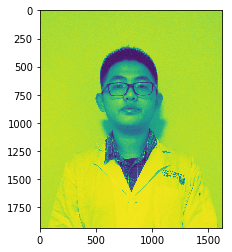

(240, 108, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x23cba7a0898>,
 Text(0.5, 1.0, 'a'))

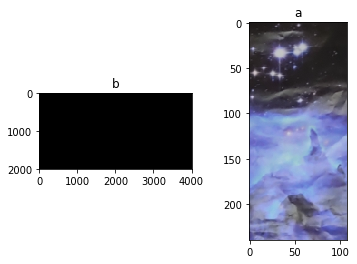

In [19]:
qx=cv2.imread('mh1.jpg')
print(qx.shape)
pts1=np.float32([[1000,1000],[1200,500],[1000,750],[700,650]])
pts2=np.float32([[0,0],[4608,0],[4608,2112],[0,2112]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(qx,M,(4000,2000))
plt.subplot(1,2,1),plt.imshow(dst),plt.title('b')
plt.subplot(1,2,2),plt.imshow(qx),plt.title('a')

(<matplotlib.axes._subplots.AxesSubplot at 0x23cc956cc18>,
 Text(0.5, 1.0, 'a'))

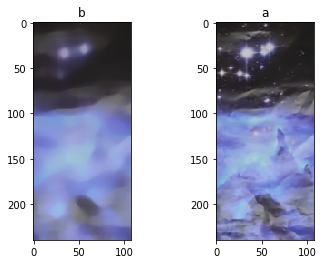

In [25]:
m=cv2.medianBlur(qx,15)
plt.subplot(1,2,1),plt.imshow(m),plt.title('b')
plt.subplot(1,2,2),plt.imshow(qx),plt.title('a')

(<matplotlib.axes._subplots.AxesSubplot at 0x23cc9a0e978>,
 Text(0.5, 1.0, 'a'))

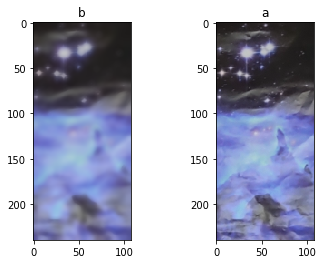

In [33]:
blur = cv2.bilateralFilter(qx,8,200,200)
plt.subplot(1,2,1),plt.imshow(blur),plt.title('b')
plt.subplot(1,2,2),plt.imshow(qx),plt.title('a')

(<matplotlib.axes._subplots.AxesSubplot at 0x23cca3af7b8>,
 Text(0.5, 1.0, 'gradient'))

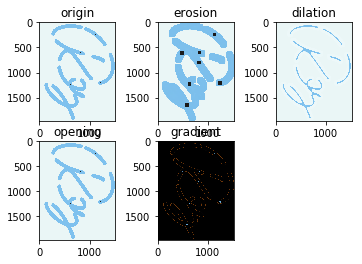

In [49]:
img=cv2.imread('cs2.png')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 15)
dilation = cv2.dilate(img,kernel,iterations = 10)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.subplot(2,3,1),plt.imshow(img),plt.title('origin')
plt.subplot(2,3,2),plt.imshow(erosion),plt.title('erosion')
plt.subplot(2,3,3),plt.imshow(dilation),plt.title('dilation')
plt.subplot(2,3,4),plt.imshow(opening),plt.title('opening')
plt.subplot(2,3,5),plt.imshow(gradient),plt.title('gradient')

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

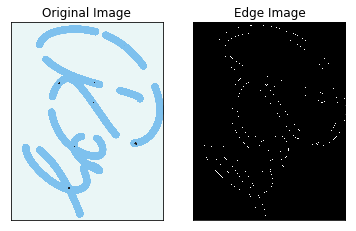

In [54]:
edges = cv2.Canny(img,20,500)
plt.subplot(121),plt.imshow(img,cmap = 'gray') 
plt.title('Original Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x2472bc45e48>,
 <matplotlib.image.AxesImage at 0x2472bc9aba8>)

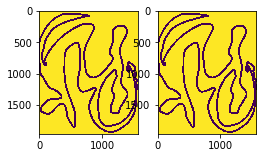

In [14]:
a=cv2.imread('cs5.jpg',0)
ret,thresh = cv2.threshold(a,120,200,cv2.THRESH_BINARY)
plt.imshow(thresh)
contours, image = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
hull = cv2.convexHull(cnt)
img = cv2.drawContours(a, [cnt], -1, (0,255,0), 30)
plt.subplot(1,3,1),plt.imshow(img)
plt.subplot(1,3,2),plt.imshow(a)

In [53]:
l = tuple(cnt[cnt[:,:,0].argmin()][0])
r = tuple(cnt[cnt[:,:,0].argmax()][0])
t = tuple(cnt[cnt[:,:,1].argmin()][0]) 
b = tuple(cnt[cnt[:,:,1].argmax()][0])
display(l,r,t,b)

(0, 518)

(1556, 1107)

(456, 45)

(1126, 1926)

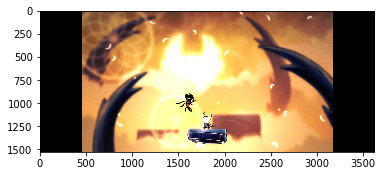

In [2]:
img=plt.imread('kd.jpg')
plt.imshow(img)

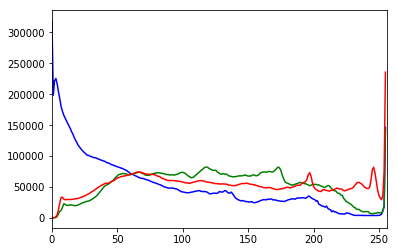

In [93]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([a],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 
plt.show()

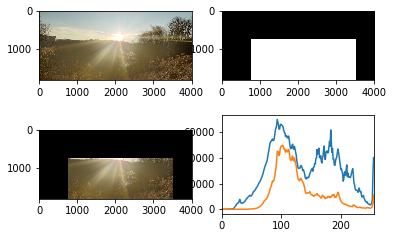

In [94]:
mask = np.zeros(img.shape[:2], np.uint8) 
mask[750:2500, 750:3500] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
hist_full = cv2.calcHist([img],[0],None,[256],[0,256]) 
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

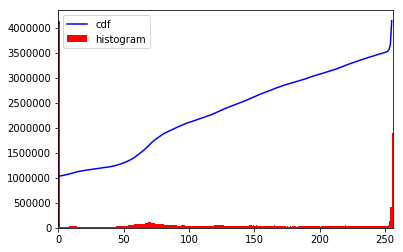

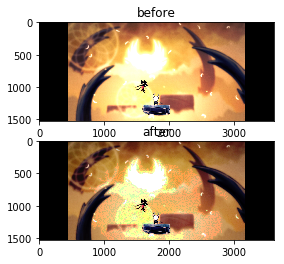

In [4]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
cdf_m = np.ma.masked_equal(cdf,0) 
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) 
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.subplot(2,1,1),plt.imshow(img),plt.title('before')
plt.subplot(2,1,2),plt.imshow(img2),plt.title('after')
plt.savefig('af.jpg',dpi=4500)

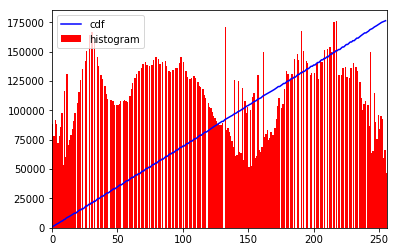

In [7]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [12]:
img=cv2.imread('bg.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6)) 
cl1 = clahe.apply(img)
cv2.imwrite('xx.jpg',cl1)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\clahe.cpp:351: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


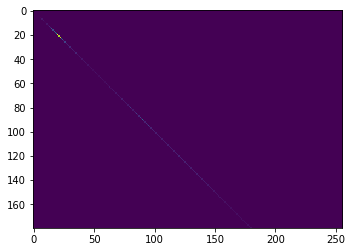

In [20]:
img=cv2.imread('bg.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist, xbins, ybins = np.histogram2d(hsv.ravel(),hsv.ravel(),[180,256],[[0,180],[0,256]])

plt.imshow(hist,interpolation = 'nearest')
plt.show()

369 478 3 5
349 438 1 1
219 437 4 4
91 437 2 1
223 436 1 1
225 433 3 3
69 433 3 2
208 432 2 2
229 431 2 3
346 429 1 1
84 429 2 1
244 425 1 1
221 425 1 1
214 425 3 5
58 423 2 2
343 421 2 5
205 414 7 8
391 399 1 1
356 399 34 6
393 397 10 3
250 384 4 3
68 380 105 79
158 452 3 3
168 451 4 4
150 450 3 3
163 441 3 4
151 441 7 11
151 441 4 3
159 437 5 10
143 437 3 3
149 436 3 3
150 433 6 5
114 432 3 4
111 432 3 4
144 430 6 11
131 429 3 5
142 428 4 4
134 428 8 12
109 428 3 7
134 427 3 3
102 424 3 3
125 423 7 13
103 422 3 4
124 421 3 3
106 421 4 5
113 419 3 5
116 417 8 18
108 413 7 8
70 399 4 3
83 391 4 6
82 391 3 3
85 390 5 3
83 386 9 5
168 361 1 1
153 355 14 11
321 353 10 24
322 351 1 1
158 350 4 3
143 348 13 11
148 349 5 5
409 343 1 1
152 343 8 8
389 342 9 9
142 342 6 8
431 340 1 1
140 336 6 8
287 335 2 1
138 333 7 6
100 333 65 67
387 331 3 7
313 331 1 2
312 328 1 1
437 327 3 3
296 327 2 1
435 325 1 1
386 324 1 2
433 323 1 1
271 320 12 11
276 321 5 5
304 319 1 1
285 317 3 4
267 317 7 8
269 3

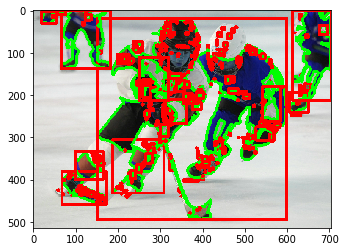

In [37]:
l=cv2.imread('bq3.jpg')
i = cv2.cvtColor(l,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(i,127,255,1)
ct,img=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for cnt in ct:
    img=cv2.drawContours(l,[cnt],-1,(0,255,0),5)
    x,y,w,h=cv2.boundingRect(cnt)
    print(x,y,w,h)
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    plt.imshow(img)

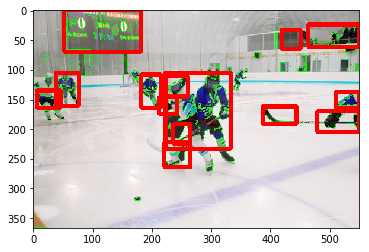

In [2]:
k=cv2.imread('bq2.jpg')#800
ww=[]
wl=[]
wx=[]
wy=[]
i = cv2.cvtColor(k,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(i,127,255,1)
ct,img=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for cnt in ct:
    img=cv2.drawContours(k,[cnt],-1,(0,255,0),1)
    x,y,w,h=cv2.boundingRect(cnt)
    ww.append(w)
    wl.append(h)
    wx.append(x)
    wy.append(y)
bigw=max(ww)
bigh=max(wl)
thre=0.05*bigw*bigh
for i in range(len(ww)):
    x=wx[i]
    y=wy[i]
    w=ww[i]
    h=wl[i]
    if  w*h>thre:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
plt.imshow(img)
plt.savefig('bb.jpg',dpi=700)

In [47]:
b=k.shape
a=list(b)
l=a[0]
w=a[1]
display(l,w)

169

299

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from numba import jit
@jit

def yp():
    ww=[]
    wl=[]
    wx=[]
    wy=[]
    cap = cv2.VideoCapture('[电影天堂www.dy2018.com]哪吒之魔童降世HD国语中字.mkv')
    while(1):
        _, frame = cap.read()
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(hsv,127,255,1)
        ct,img=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        for cnt in ct:
            img=cv2.drawContours(frame,[cnt],-1,(0,255,0),2)
            x,y,w,h=cv2.boundingRect(cnt)
            ww.append(w)
            wl.append(h)
            wx.append(x)
            wy.append(y)
            bigw=max(ww)
            bigh=max(wl)
            thre=0.05*bigw*bigh
            for i in range(len(ww)):
                x=wx[i]
                y=wy[i]
                w=ww[i]
                h=wl[i]
                if  w*h>thre:
                    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
                    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
                cv2.imshow('rect',img)
        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            break
    cv2.destroyAllWindows()

In [ ]:
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y)) 
    radius = int(radius) 
    img2= cv2.circle(img,center,radius,(0,255,0),20)
    plt.subplot(1,2,2),plt.imshow(img2)
            epsilon = 0.001*cv2.arcLength(cnt,True) 
        approx = cv2.approxPolyDP(cnt,epsilon,True)
                img=cv2.drawContours(l,[cnt],-1,(0,255,0),7)

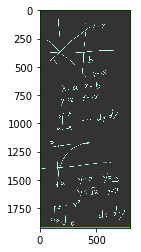

In [24]:
sf()

In [ ]:
yp()

In [ ]:
x,y,w,h=cv2.boundingRect(cnt)
            img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)

In [1]:
import numpy as np 
import cv2
from numba import jit
@jit
def rl():
    ww=[]
    wl=[]
    wx=[]
    wy=[]
    cap = cv2.VideoCapture(0)
    while(True):
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(hsv,127,255,1)
        ct,img=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        for cnt in ct:
            img=cv2.drawContours(frame,[cnt],-1,(0,255,0),1)
            x,y,w,h=cv2.boundingRect(cnt)
            ww.append(w)
            wl.append(h)
            wx.append(x)
            wy.append(y)
            thre=200*300
            if  w*h>thre:
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
            cv2.imshow('rect',img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release() 
    cv2.destroyAllWindows()


In [ ]:
rl()

In [1]:
import numpy as np 
import cv2
from numba import jit
@jit
def rl1():
    cap = cv2.VideoCapture(0)
    while(True):
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(hsv,127,255,1)
        blur=cv2.bilateralFilter(thresh,3,15,15)
        ct,img=cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        for cnt in ct:
            ep=1e-20*cv2.arcLength(cnt,True)
            approx=cv2.approxPolyDP(cnt,ep,True)
            img=cv2.drawContours(frame,[approx],-1,(0,255,0),1)
            x,y,w,h=cv2.boundingRect(cnt)
            thre=200*180
            if  w*h>thre:
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
                img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
            cv2.imshow('rect',img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release() 
    cv2.destroyAllWindows()


In [ ]:
rl1()

In [1]:
import numpy as np
import pyautogui
import imutils
import cv2

In [2]:
def screenshot():
    image = pyautogui.screenshot()
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    cv2.imwrite("in_memory_to_disk.png", image)
    pyautogui.screenshot("straight_to_disk.png")
    image = cv2.imread("straight_to_disk.png")
    cv2.imshow("Screenshot", imutils.resize(image, width=600))
    cv2.waitKey(0)

-1

In [3]:
>>> screenWidth, screenHeight = pyautogui.size()
>>> currentMouseX, currentMouseY = pyautogui.position()
>>> pyautogui.moveTo(100, 150)
>>> pyautogui.click()
>>> pyautogui.moveRel(None, 10)  # move mouse 10 pixels down
>>> pyautogui.doubleClick()
>>> pyautogui.moveTo(500, 500, duration=2, tween=pyautogui.easeInOutQuad)  # use tweening/easing function to move mouse over 2 seconds.
>>> pyautogui.typewrite('Hello world!', interval=0.25)  # type with quarter-second pause in between each key
>>> pyautogui.press('esc')
>>> pyautogui.keyDown('shift')
>>> pyautogui.press(['left', 'left', 'left', 'left', 'left', 'left'])
>>> pyautogui.keyUp('shift')
>>> pyautogui.hotkey('ctrl', 'c')

In [4]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while (True):
    _,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    kernel = np.ones((16,16),np.float32)/256
    smoothed =cv2.filter2D(hsv,-1,kernel)
    blur=cv2.GaussianBlur(hsv,(15,15),0)
    
    bilateral=cv2.bilateralFilter(hsv,15,75,75)
    median=cv2.medianBlur(hsv,15)
    cv2.imshow('a',smoothed)
    cv2.imshow('b',blur)
    cv2.imshow('c',median)
    cv2.imshow('d',bilateral)
    k=cv2.waitKey(5)&0xFF
    if k==27:
        break
cap.release() 
cv2.destroyAllWindows()

In [12]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while (True):
    _,frame=cap.read()
    laplace=cv2.Laplacian(frame,cv2.CV_64F)
    sobelx=cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=3)
    sobely=cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=3)
    edg=cv2.Canny(frame,100,200)
    cv2.imshow('a',laplace)
    cv2.imshow('b',sobelx)
    cv2.imshow('c',sobely)
    cv2.imshow('d',edg)
    k=cv2.waitKey(5)&0xFF
    if k==27:
        break
cap.release() 
cv2.destroyAllWindows()